In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from scipy import stats
import statsmodels.api as sm

os.chdir('/Users/chengchen/Desktop/Insight/19C/')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Data Exploration

In [2]:
data_dir = 'Challenge_Video Game Sales/vgsales.csv'
df = pd.read_csv(data_dir)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


* From the summary statistics above, the sales data are highly scew to the left (long right tail)

In [4]:
# about 270 out of 16600 data points miss year info => will drop these data
df = df.dropna(subset=["Year"])

In [5]:
print('number of platforms in this dataset:', df['Platform'].nunique())
print('number of genres in this dataset:', df['Genre'].nunique())
print('number of publishers in this dataset:', df['Publisher'].nunique())
print('number of games in this dataset:', df['Name'].nunique())

number of platforms in this dataset: 31
number of genres in this dataset: 12
number of publishers in this dataset: 576
number of games in this dataset: 11360


In [6]:
df_gr_mkt = df.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales'].sum()
df_gr_mkt.head()

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,861.80,516.48,158.66
Adventure,102.06,63.79,52.01
Fighting,220.74,100.00,87.15
Misc,402.48,213.82,106.67
Platform,445.99,200.67,130.65


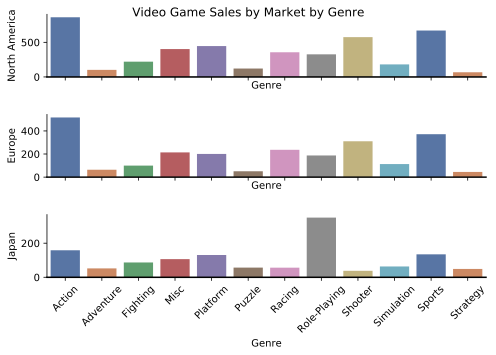

In [7]:
# bar plot: genre * market
f, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)
x = df_gr_mkt.index
y1 = df_gr_mkt.NA_Sales
sns.barplot(x=x, y=y1, palette = "deep", ax=ax1)
plt.xticks(rotation=45, fontsize=10)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("North America")

y2 = df_gr_mkt.EU_Sales
sns.barplot(x=x, y=y2, palette = "deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Europe")

y3 = df_gr_mkt.JP_Sales
sns.barplot(x=x, y=y3, palette = "deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Japan")

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
f.suptitle('Video Game Sales by Market by Genre')


In [32]:
# bar plot: platform * market
top_platforms = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending = False).head(10)
top_platforms

Platform
PS2     1233.46
X360     969.61
PS3      949.35
Wii      909.81
DS       818.96
PS       727.39
GBA      313.56
PSP      291.71
PS4      278.10
PC       255.05
Name: Global_Sales, dtype: float64

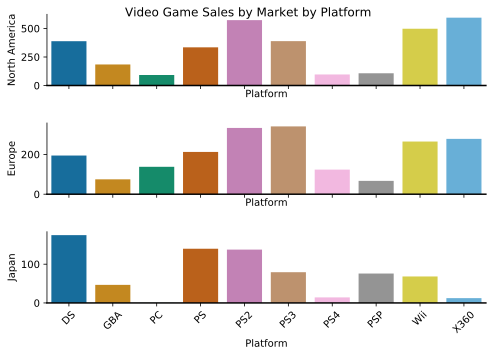

In [56]:
df_top_platforms = df[df['Platform'].isin(top_platforms.index.tolist())]
df_top_platforms = df_top_platforms.groupby(['Platform'])['NA_Sales','EU_Sales','JP_Sales'].sum()
# bar plot: platform * market
f, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)
x = df_top_platforms.index
y1 = df_top_platforms.NA_Sales
sns.barplot(x=x, y=y1, palette = "colorblind", ax=ax1)
plt.xticks(rotation=45, fontsize=10)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("North America")

y2 = df_top_platforms.EU_Sales
sns.barplot(x=x, y=y2, palette = "colorblind", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Europe")

y3 = df_top_platforms.JP_Sales
sns.barplot(x=x, y=y3, palette = "colorblind", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Japan")

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
f.suptitle('Video Game Sales by Market by Platform')


In [8]:
# line plot: year * market
df.Year = df.Year.astype(int)
df_yr_mkt = df.groupby(['Year'])['NA_Sales','EU_Sales','JP_Sales'].sum()
df_yr_mkt.columns = ['North America','Europe','Japan']
df_yr_mkt.head()

,North America,Europe,Japan
Year,,,
1980,10.59,0.67,0.00
1981,33.40,1.96,0.00
1982,26.92,1.65,0.00
1983,7.76,0.80,8.10
1984,33.28,2.10,14.27


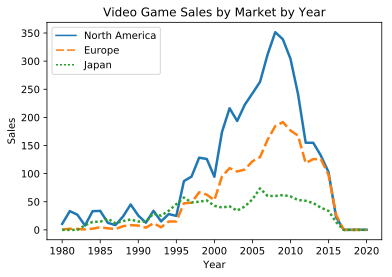

In [9]:
sns.lineplot(data = df_yr_mkt, linewidth=2.5)
plt.ylabel('Sales')
plt.title('Video Game Sales by Market by Year')


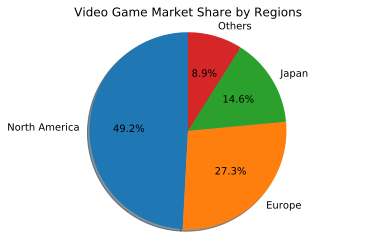

In [10]:
# Draw pie chart of market shares by region
sales_region = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().tolist()
pie_labels = 'North America', 'Europe', 'Japan', 'Others'
fig, ax = plt.subplots()
ax.pie(sales_region, labels=pie_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Video Game Market Share by Regions')


## What video games are trending in each market?
The dataset does not contain many data points after year 2016. Therefore trending = popular in 2016!<br>
Some game names end with a number or a name of a specific version. <br>
Need to clean the dataset by identifying the same games. <br>
e.g. FIFA 15 and FIFA 16 should be considered as one game; Assassin's Creed: Unity and Assassin's Creed: Origin should be considered one game.

In [37]:
df['Name_adj'] = df['Name'].str.split(pat = ":").str[0] # delete everything in name after ":"
df['Name_adj'] = df['Name_adj'].str.replace('\d+', '') # delete all the numbers in the name
romans= ["I","II","III","IV","V","VI","VII","VIII","IX"]
pattern = '|'.join(romans)
df['last_word'] = df['Name_adj'].str.split().str[-1]
df['last_word_roman'] = df['last_word'].str.contains(pattern)
df['Name_adj2'] = df['Name_adj'][df['last_word_roman']==True].str.rsplit(' ', 1).str[0]
df['Name_adj'].update(df['Name_adj2'])

print('distinct game name pre-processing:', df['Name'].nunique())
print('distinct game name after processing:', df['Name_adj'].nunique())

distinct game name pre-processing: 11360
distinct game name after processing: 8083


In [12]:
def return_year_pop(top_num, market, year):
    """return top x most popular games in year 2016 in market y"""
    df1 = df[df['Year']==year]
    df2 = df1.groupby(['Name_adj'])['NA_Sales','EU_Sales','JP_Sales'].sum()
    df2 = df2.sort_values(market,ascending = False).head(top_num)
    df3 = df2[[market]]
    df3.columns = [market+'_'+str(year)]
    return df3

In [13]:
def find_trending_games(top_num, market):
    df16 = return_year_pop(top_num, market, 2016)
    df15 = return_year_pop(top_num, market, 2015)
    df14 = return_year_pop(top_num, market, 2014)
    df16 = df16.join(df15).join(df14)
    return df16
find_trending_games(10, 'EU_Sales')


,EU_Sales_2016,EU_Sales_2015,EU_Sales_2014
Name_adj,,,
FIFA,5.48,11.29,12.4
Tom Clancy's The Division,2.37,NaN,NaN
Uncharted,2.07,NaN,NaN
Far Cry,1.57,NaN,NaN
Overwatch,1.11,NaN,NaN
LEGO Marvel's Avengers,1.00,NaN,NaN
Doom (),0.99,NaN,NaN
No Man's Sky,0.74,NaN,NaN
Lego Star Wars,0.68,NaN,NaN


In [14]:
find_trending_games(10, 'NA_Sales')


,NA_Sales_2016,NA_Sales_2015,NA_Sales_2014
Name_adj,,,
Tom Clancy's The Division,2.68,NaN,NaN
Madden NFL,1.75,5.78,5.66
NBA K,1.44,5.64,5.01
Overwatch,1.38,NaN,NaN
Uncharted,1.30,NaN,NaN
Far Cry,1.09,NaN,NaN
LEGO Marvel's Avengers,0.96,NaN,NaN
Doom (),0.94,NaN,NaN
MLB,0.81,NaN,NaN


In [15]:
find_trending_games(10, 'JP_Sales')

,JP_Sales_2016,JP_Sales_2015,JP_Sales_2014
Name_adj,,,
Yokai Watch,1.27,NaN,NaN
Dragon Quest Builders,0.64,NaN,NaN
Dragon Quest Heroes,0.64,0.86,NaN
Dragon Quest Monsters Joker,0.63,NaN,NaN
Yokai Sangokushi,0.55,NaN,NaN
Jikkyou Powerful Pro Baseball,0.45,NaN,NaN
Persona,0.44,NaN,NaN
Kirby,0.44,NaN,0.79
Mario & Sonic at the Rio Olympic Games,0.34,NaN,NaN
